# Linear Regression

**Business case:**  John is the CEO of a winery located in Vilafranca del Penedés. He was really happy with the results regarding red wine. 

    "He has contacted us again because he wants to repeat the same procedure but, in this case, for the white wines varieties that he has.
    
    
  He has to perform a lot of measurements (analysis) to each variety of wine. Among the measurements, the one related to Density it's extremely slow: it takes more than one day per sample. He has contacted you because he wants to know whether it could be possible to build a mathematical model in order to quantify this specific variable on new samples, considering other features from each wine. Building a model that may fit his interest will have important consecuencies for his business: he will save time and money.
  
**Key information**:

- fixed acidity: information regarding tartaric acid content (g / dm^3),most acids involved with wine or fixed or nonvolatile (do not evaporate readily). Range [6- 15]
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. Range[100-1500]
- citric acid:found in small quantities, citric acid can add ‘freshness’ and flavor to wines. Range [0-1]
- residual sugar:the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet. Range [0-20]
- chlorides: the amount of salt in the wine. Range [0-500]
free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine. Range [0-750]
- total sulfur dioxide:amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine. Range [0-250]
- water_cont:content of water in the wine. Range [0-100]
- pH:describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. Range [0-14]
- sulphates:a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant. Range [0-5]
- alcohol:the percent alcohol content of the wine. Range [5-20]
- quality:quality of the wines based on sensory analysis. Range [1-10]
- density:the density of water is close to that of water depending on the percent alcohol and sugar content. Range [1-100]

In [71]:
# Use the csv: Ex3.1.winequality-white.csv to perform this analysis. 

## EDA & Data Cleaning

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score

%matplotlib inline

In [73]:
import sys  

sys.path.insert(0, "../../datasets")

from functions_plot_EDA import *

### Overall look

In [74]:
df = pd.read_csv('../../datasets/Students_turn/Ex3.1.winequality-white.csv', header=[0], sep=';',decimal=',')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Age
0,7.02,0.26,0.21,16.20,0.074,41.0,197.0,0.9980,3.02,0.50,9.8,3,10
1,6.02,0.24,0.44,3.50,0.029,5.0,109.0,0.9913,3.53,0.43,11.7,3,12
2,7.02,0.59,0.38,1.60,0.066,34.0,182.0,0.9968,3.23,0.38,8.5,3,14
3,7.02,0.32,0.32,11.00,0.038,16.0,66.0,0.9937,3.24,0.40,11.5,3,13
4,6.02,0.39,0.40,4.60,0.022,5.0,19.0,0.9915,3.31,0.37,12.6,3,11
5,7.02,0.17,0.47,1.40,0.037,5.0,33.0,0.9939,2.89,0.28,9.6,3,15
6,6.02,0.64,0.46,10.60,0.244,33.0,227.0,0.9983,2.87,0.74,9.1,3,12
7,6.02,0.33,0.42,1.15,0.033,18.0,96.0,0.9911,3.20,0.32,12.4,3,13
8,6.02,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11.0,3,15
9,7.02,0.32,0.24,4.60,0.053,8.0,134.0,0.9958,3.14,0.50,9.1,3,15


In [75]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Age
4893,31.02,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,46
4894,31.02,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,15
4895,32.02,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,47
4896,32.02,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,49
4897,31.02,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,45


In [76]:
df.shape

(4898, 13)

In [77]:
for x in df.columns:
        print(x)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality
Age


In [78]:
# Look at columns' types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  Age                   4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [79]:
# Let's dig deeper into the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,15.896480,5.513573,6.02000,10.02000,16.020000,19.0200,32.02000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.21000,0.260000,0.3200,1.10000
citric acid,4898.0,0.538067,14.270080,0.00000,0.27000,0.320000,0.3900,999.00000
residual sugar,4898.0,6.589465,15.061426,0.60000,1.70000,5.200000,9.9000,999.00000
chlorides,4898.0,0.045770,0.021849,0.00900,0.03600,0.043000,0.0500,0.34600
free sulfur dioxide,4898.0,35.301143,17.010119,2.00000,23.00000,34.000000,46.0000,289.00000
total sulfur dioxide,4898.0,138.527460,44.243068,9.00000,108.00000,134.000000,167.0000,999.00000
density,4898.0,0.994025,0.002990,0.98711,0.99172,0.993735,0.9961,1.03898
pH,4898.0,3.188265,0.151003,2.72000,3.09000,3.180000,3.2800,3.82000
sulphates,4898.0,2.531221,142.865064,0.22000,0.41000,0.470000,0.5500,9999.00000


### Check null values

In [80]:
df.isnull().sum()

# No NaNs are present

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Age                     0
dtype: int64

### Check outliers

In [81]:
# Information about each feature's range. These are from the red wine dataset but they are
# valid for white wines too.

<span class="girk">RANGE VALUES</span>

- fixed acidity: Range [6- 15]
- volatile acidity: Range[100-1500]
- citric acid: Range [0-1]
- residual sugar: Range [0-20]
- chlorides: Range [0-500]
- free sulfur dioxide: Range [0-750]
- total sulfur dioxide: Range [0-250]
- water_cont: Range [0-100]
- pH: Range [0-14]
- sulphates: Range [0-5]
- alcohol: Range [5-20]
- quality: Range [1-10]
- density: Range [1-100]</span>

In [82]:
# Let's see if the datapoints' features fall within the appropriate range

df.describe().loc[['min','max']].T

,min,max
fixed acidity,6.02000,32.02000
volatile acidity,0.08000,1.10000
citric acid,0.00000,999.00000
residual sugar,0.60000,999.00000
chlorides,0.00900,0.34600
free sulfur dioxide,2.00000,289.00000
total sulfur dioxide,9.00000,999.00000
density,0.98711,1.03898
pH,2.72000,3.82000
sulphates,0.22000,9999.00000


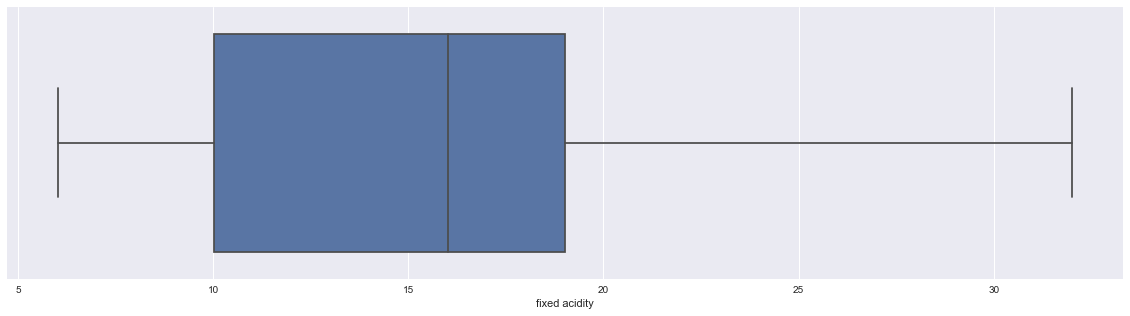

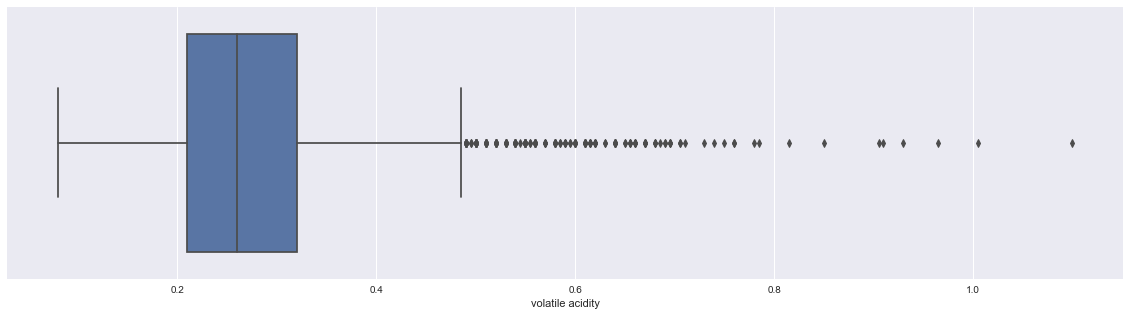

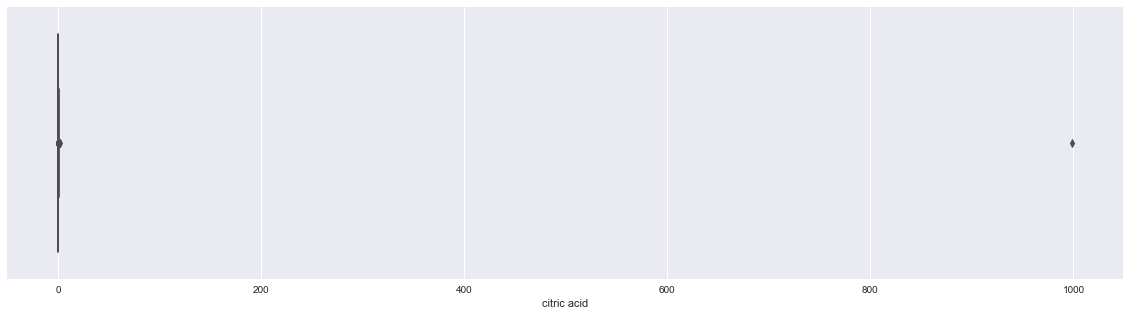

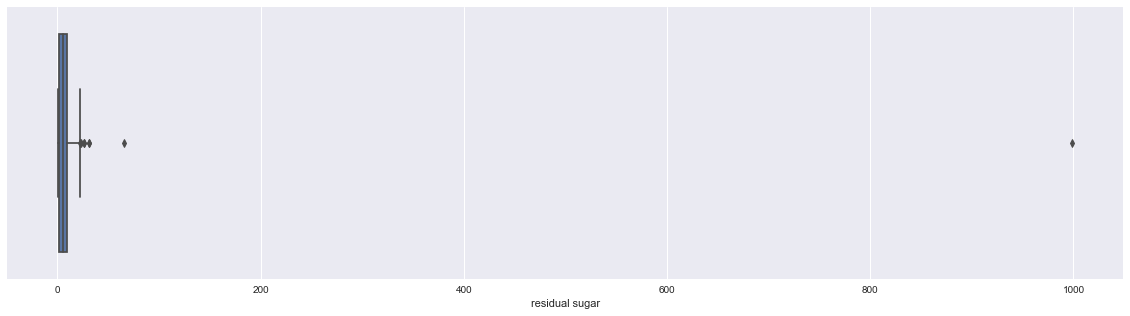

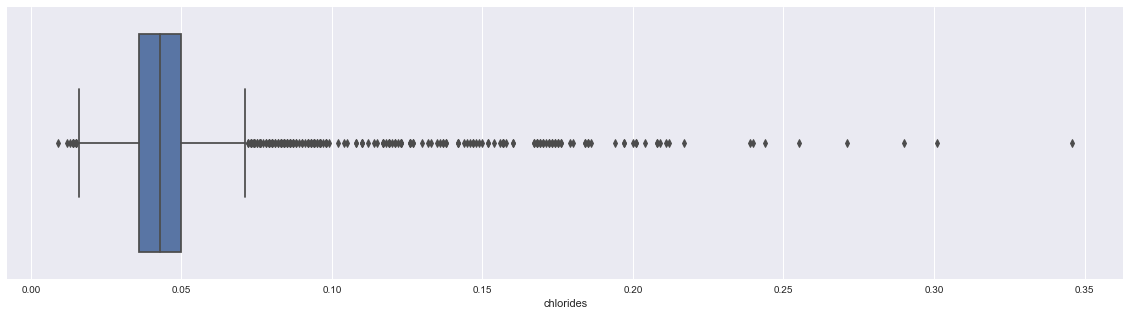

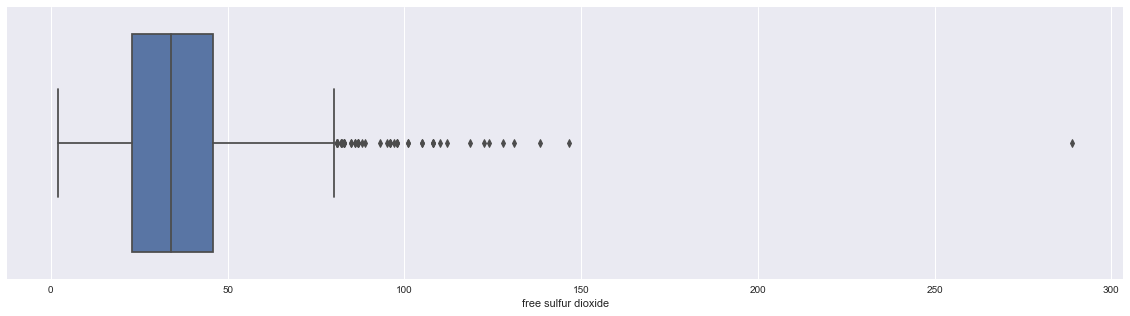

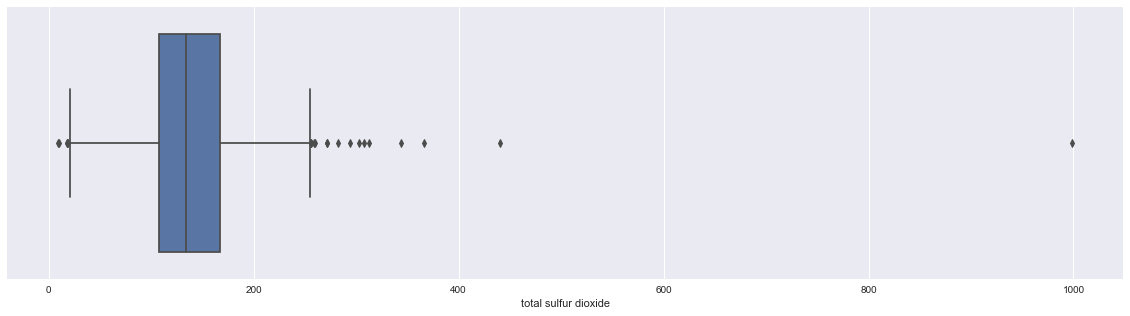

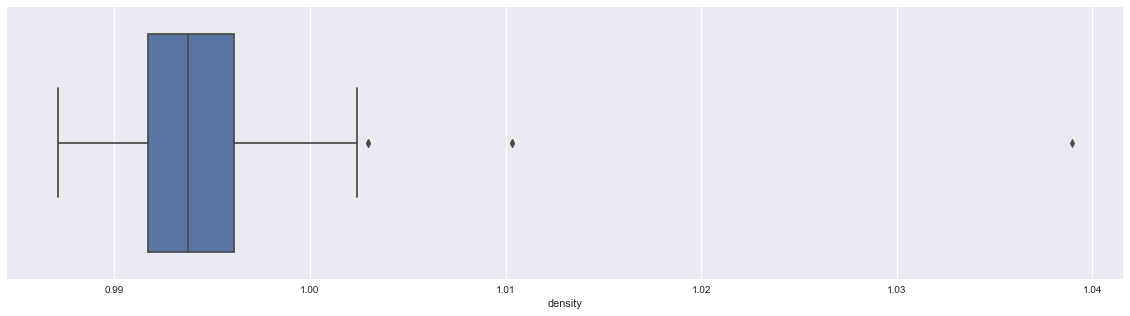

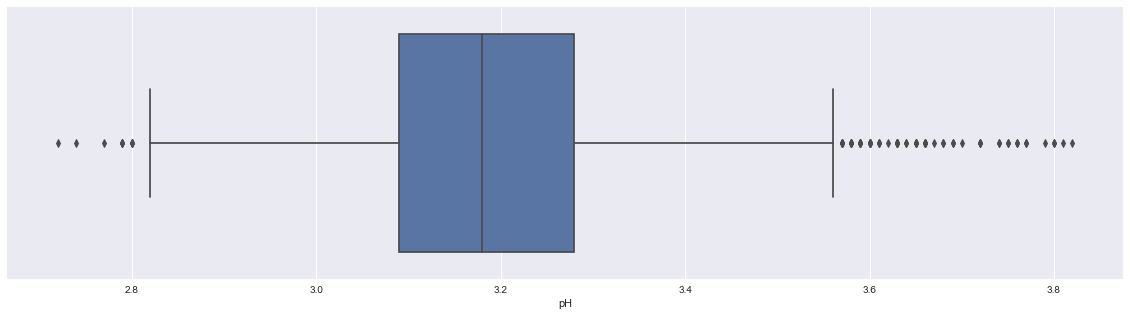

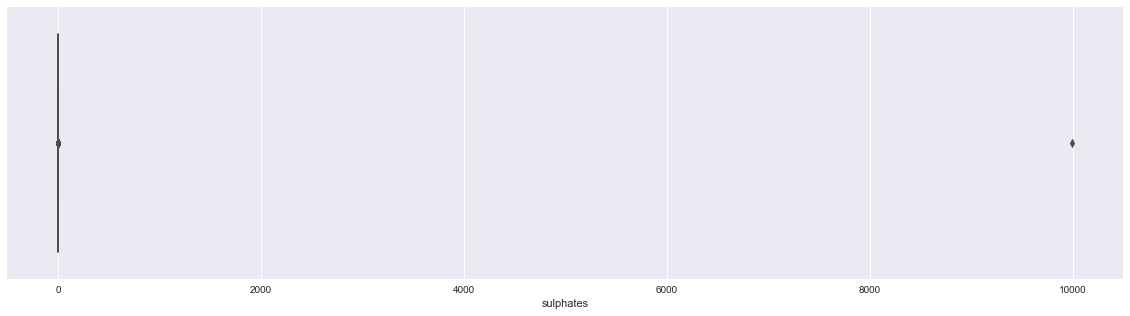

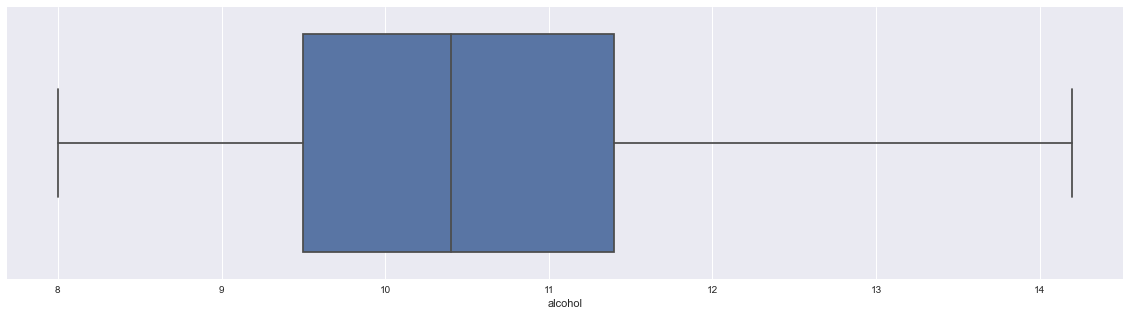

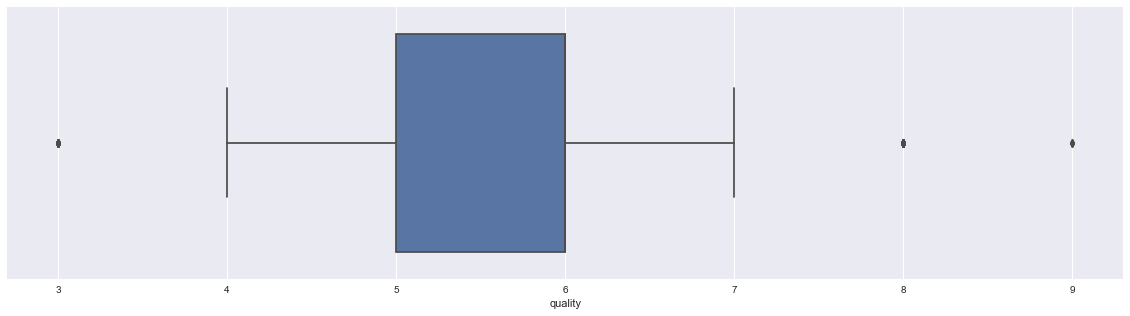

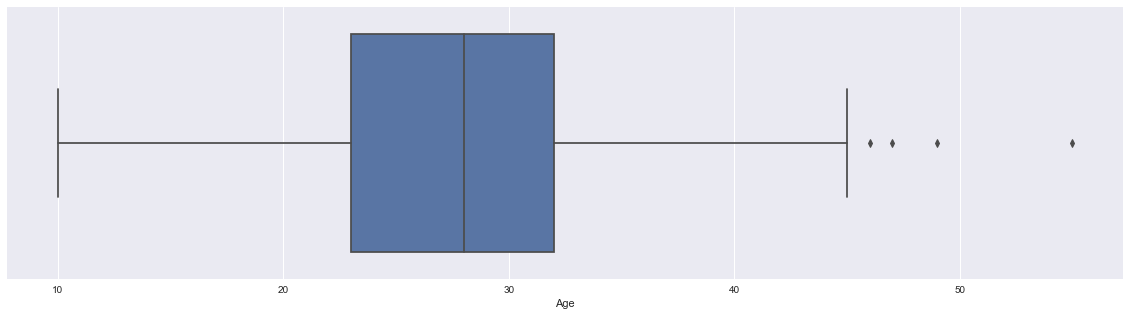

In [83]:
# Seems that we have some outliers...

for col in df:
    fig_dims = (20, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot(x=df[col],ax=ax)
    
    
# Some comments. Volatile acidity has a long tail and it's positively skewed.
# The range of citric acid is very small (0-1) indeed but the box is so tight because
# there definitely is an outlier with a value of 999 that alters the visualization.
# The same happens with residual sugar. We have to drop the maximum value (999) as it is
# totally out of the range (0-20).
# Chlorides plot is positively skewed with a long tail of datapoints that are above the higher
# whisker (aka 3rd quartile + IQR * 1.5).
# There is an outlier in sulphates (in fact the max value is 9999).
# Quality is a discrete feature, seems that most wines are punctuated averagely between 4 and 7
# with some exceptions of bad wines (punctuated 3 out of 10) and very good ones (8/9 out of 10)

In [84]:
# Remove the most evident outliers

df1 = df[df['citric acid'] < 1.1]
df['citric acid'].max()

df1 = df[df['residual sugar'] < 20.1]
df['residual sugar'].max()

df1 = df[df["total sulfur dioxide"]< 250.1]
df["total sulfur dioxide"].max()

df1 = df[df["sulphates"]< 5.1]
df["sulphates"].max()

9999.0

In [85]:
# Let's check the dataset after dropping the outliers - we have 45 rows less

df1.shape

(4897, 13)

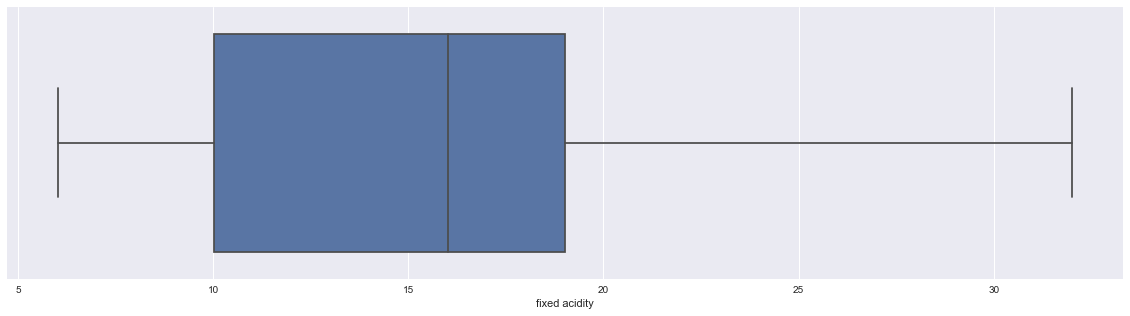

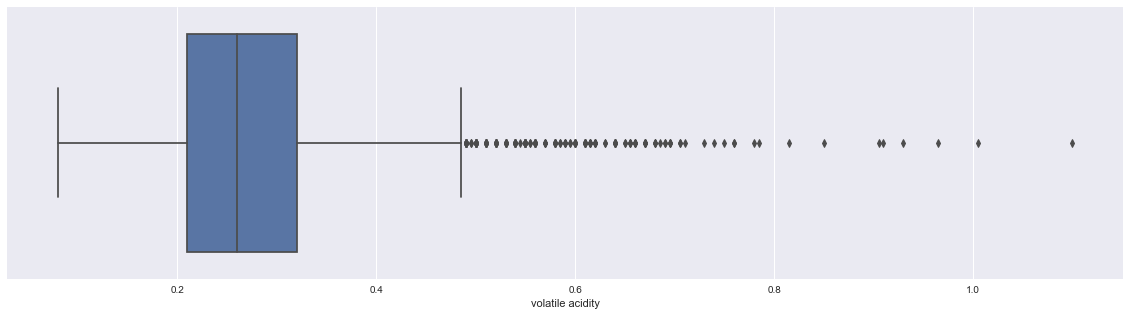

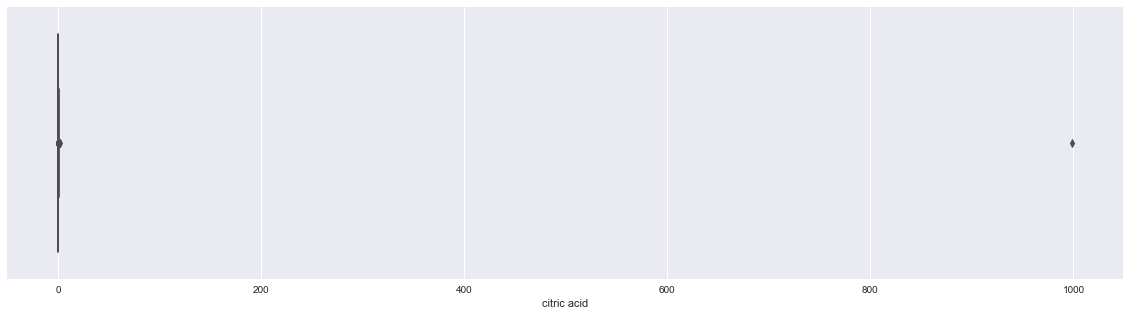

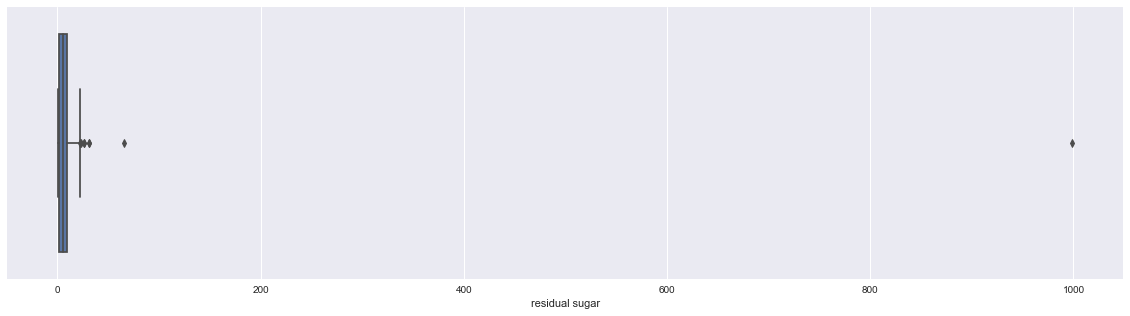

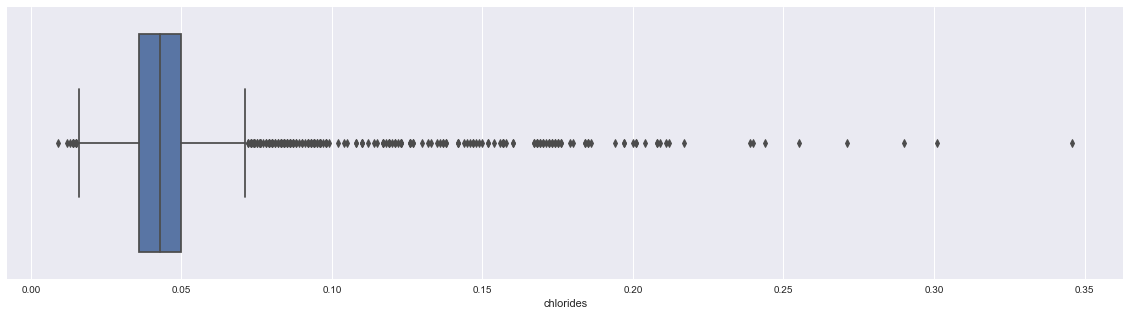

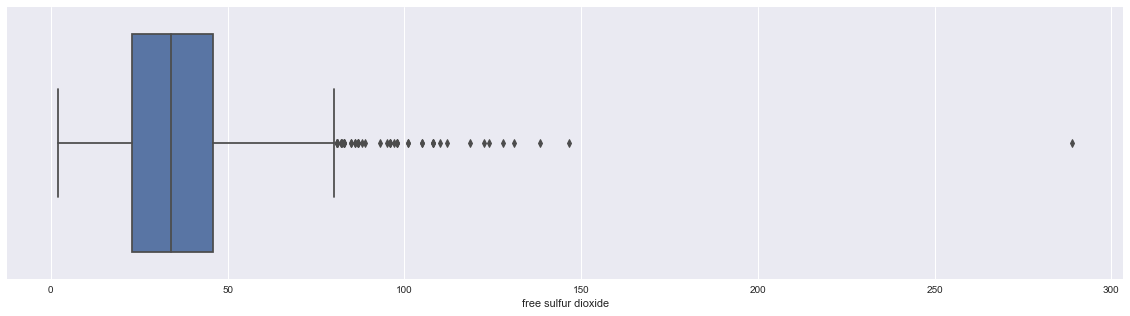

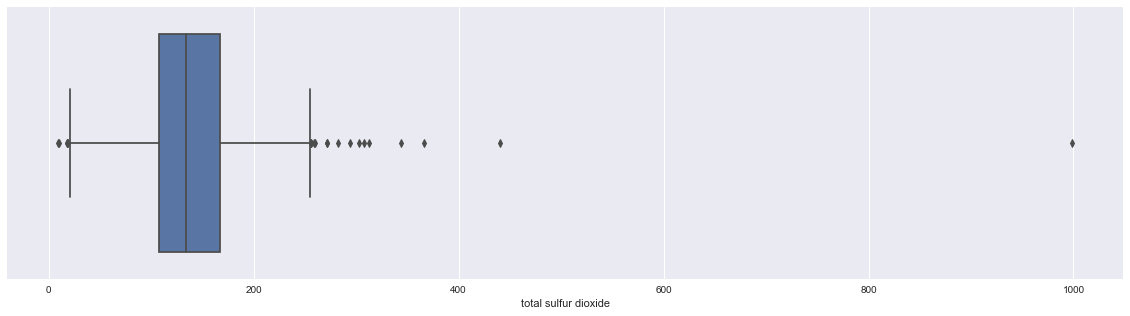

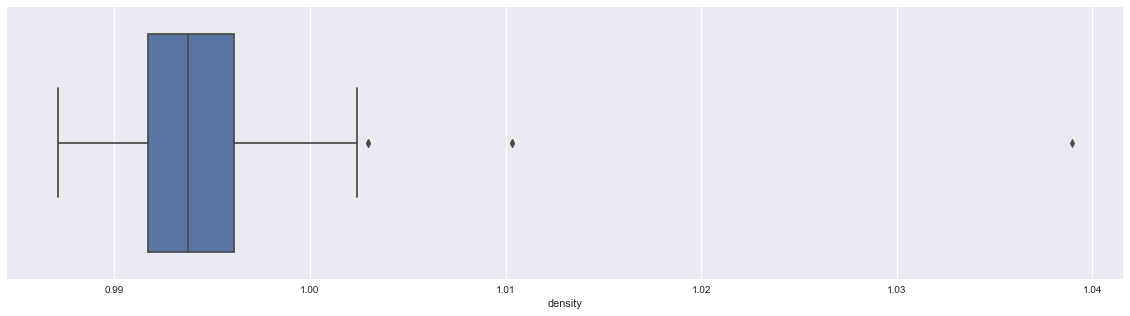

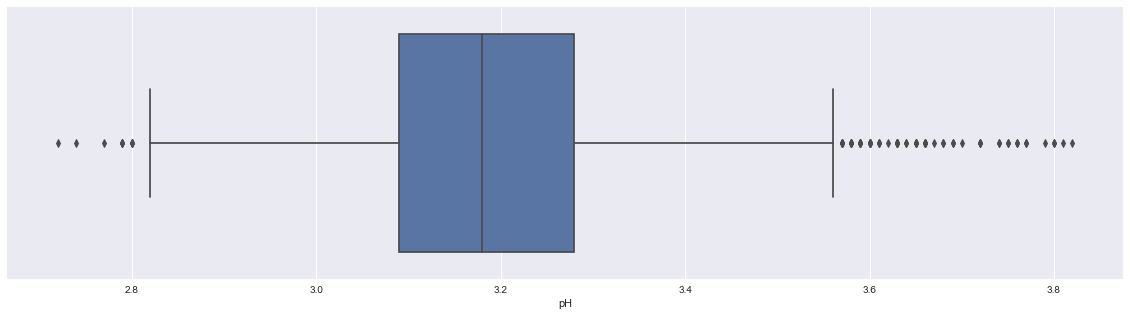

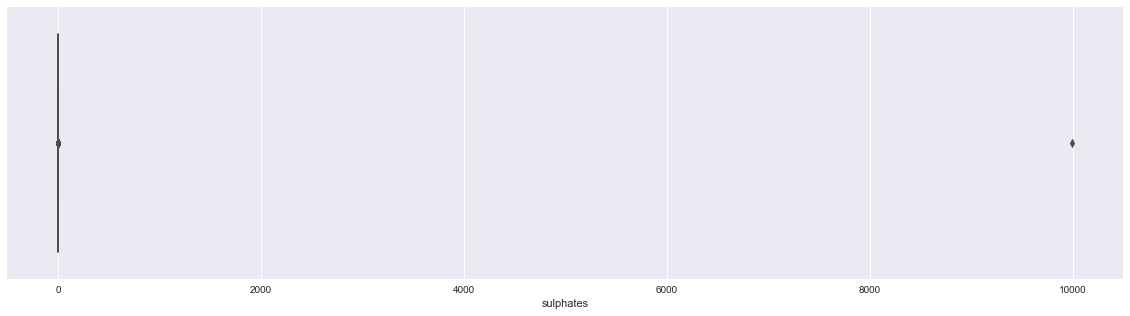

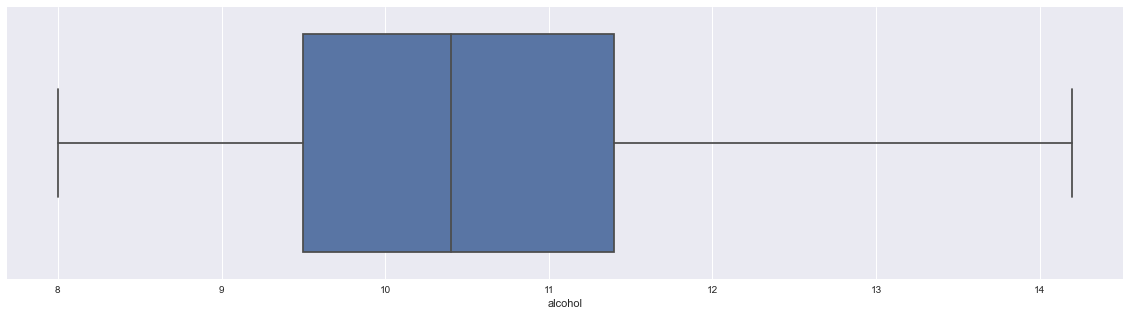

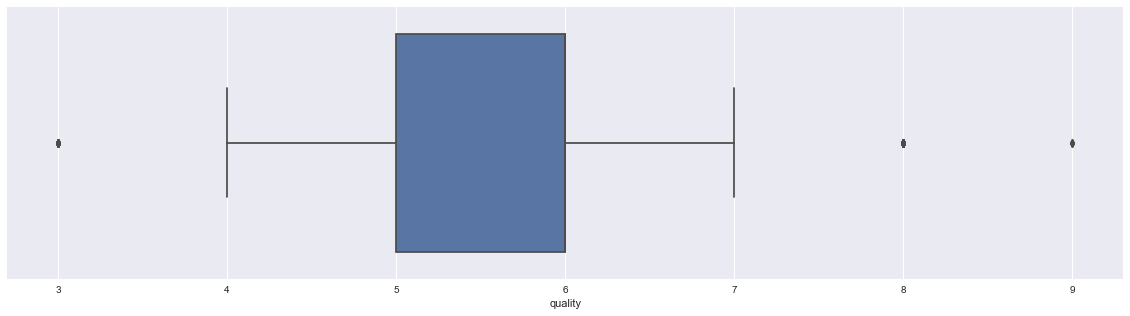

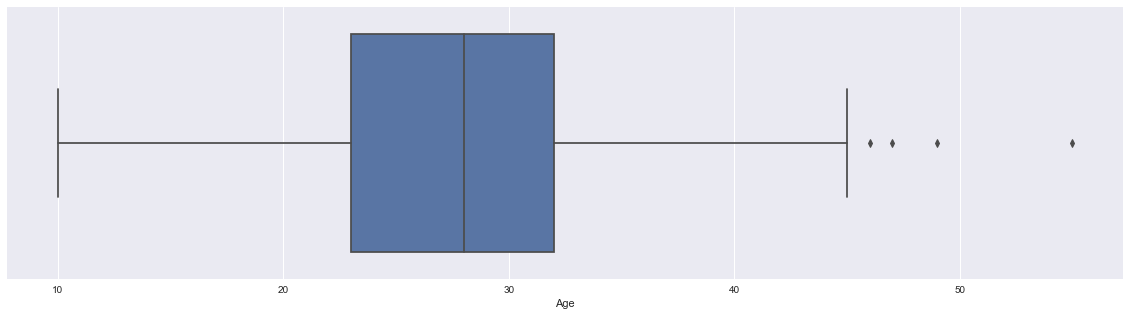

In [86]:
# Let's check the boxplot again now. Some features are still skewed but their range looks better.
# Density and alcohol boxplots look neat though, density especially.
# It's not uniform (normal distribution) but it's kinda symmetrical meaning that most
# values lie within the minimum and maximum values, the median almost splits the
# IQR in two parts of equal size and there are no outliers.

for col in df1:
    fig_dims = (20, 5)
    fig, ax = plt.subplots(figsize=fig_dims)
    sns.boxplot(x=df[col],ax=ax)

### Check correlations

In [87]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Age
fixed acidity,1.000000,-0.187349,-0.020543,-0.117845,-0.213581,-0.003725,-0.187820,-0.321264,0.107731,0.053316,0.447110,0.950902,0.916997
volatile acidity,-0.187349,1.000000,0.004682,0.064003,0.070070,-0.096691,0.089300,0.026442,-0.032844,-0.035599,0.068742,-0.193474,-0.180902
citric acid,-0.020543,0.004682,1.000000,-0.002828,-0.000183,-0.012902,-0.022748,-0.013188,-0.016360,-0.009472,0.023567,-0.030399,-0.027633
residual sugar,-0.117845,0.064003,-0.002828,1.000000,0.088791,0.299311,0.381198,0.838796,-0.193487,-0.026570,-0.450337,-0.097285,-0.104745
chlorides,-0.213581,0.070070,-0.000183,0.088791,1.000000,0.101638,0.189554,0.257343,-0.090488,0.016727,-0.360233,-0.209574,-0.208915
free sulfur dioxide,-0.003725,-0.096691,-0.012902,0.299311,0.101638,1.000000,0.583463,0.294492,0.000045,0.059040,-0.250461,0.008196,0.002062
total sulfur dioxide,-0.187820,0.089300,-0.022748,0.381198,0.189554,0.583463,1.000000,0.504109,0.005441,0.123494,-0.428412,-0.176593,-0.170738
density,-0.321264,0.026442,-0.013188,0.838796,0.257343,0.294492,0.504109,1.000000,-0.093033,0.074621,-0.780061,-0.306791,-0.307934
pH,0.107731,-0.032844,-0.016360,-0.193487,-0.090488,0.000045,0.005441,-0.093033,1.000000,0.155779,0.121119,0.100299,0.092207
sulphates,0.053316,-0.035599,-0.009472,-0.026570,0.016727,0.059040,0.123494,0.074621,0.155779,1.000000,-0.017454,0.053468,0.048980


In [88]:
corrMatrix(df1, 'magma')

In [89]:
# Seems that the most positively correlated variables are:
# fixed acidity vs quality
# fixed acidity vs age
# residual sugar vs density
# quality vs age
# There also is a negative correlation between alcohol and density.

In [90]:
# Other notes. Compared to red wines, white wines show a slightly lower correlation
# between its quality and the alcohol percent (0.44 vs 0.47) and also between
# free sulphur and total sulphure (0.61 vs 0.67).
# On the other hand, the correlation of fixed acidity vs quality is higher
# for white wines as it's 0.95 vs 0.85.
# There is a big difference in the residual sugar vs density correlation. Here is
# much bigger (0.83 vs 0.02) compared to red wines.

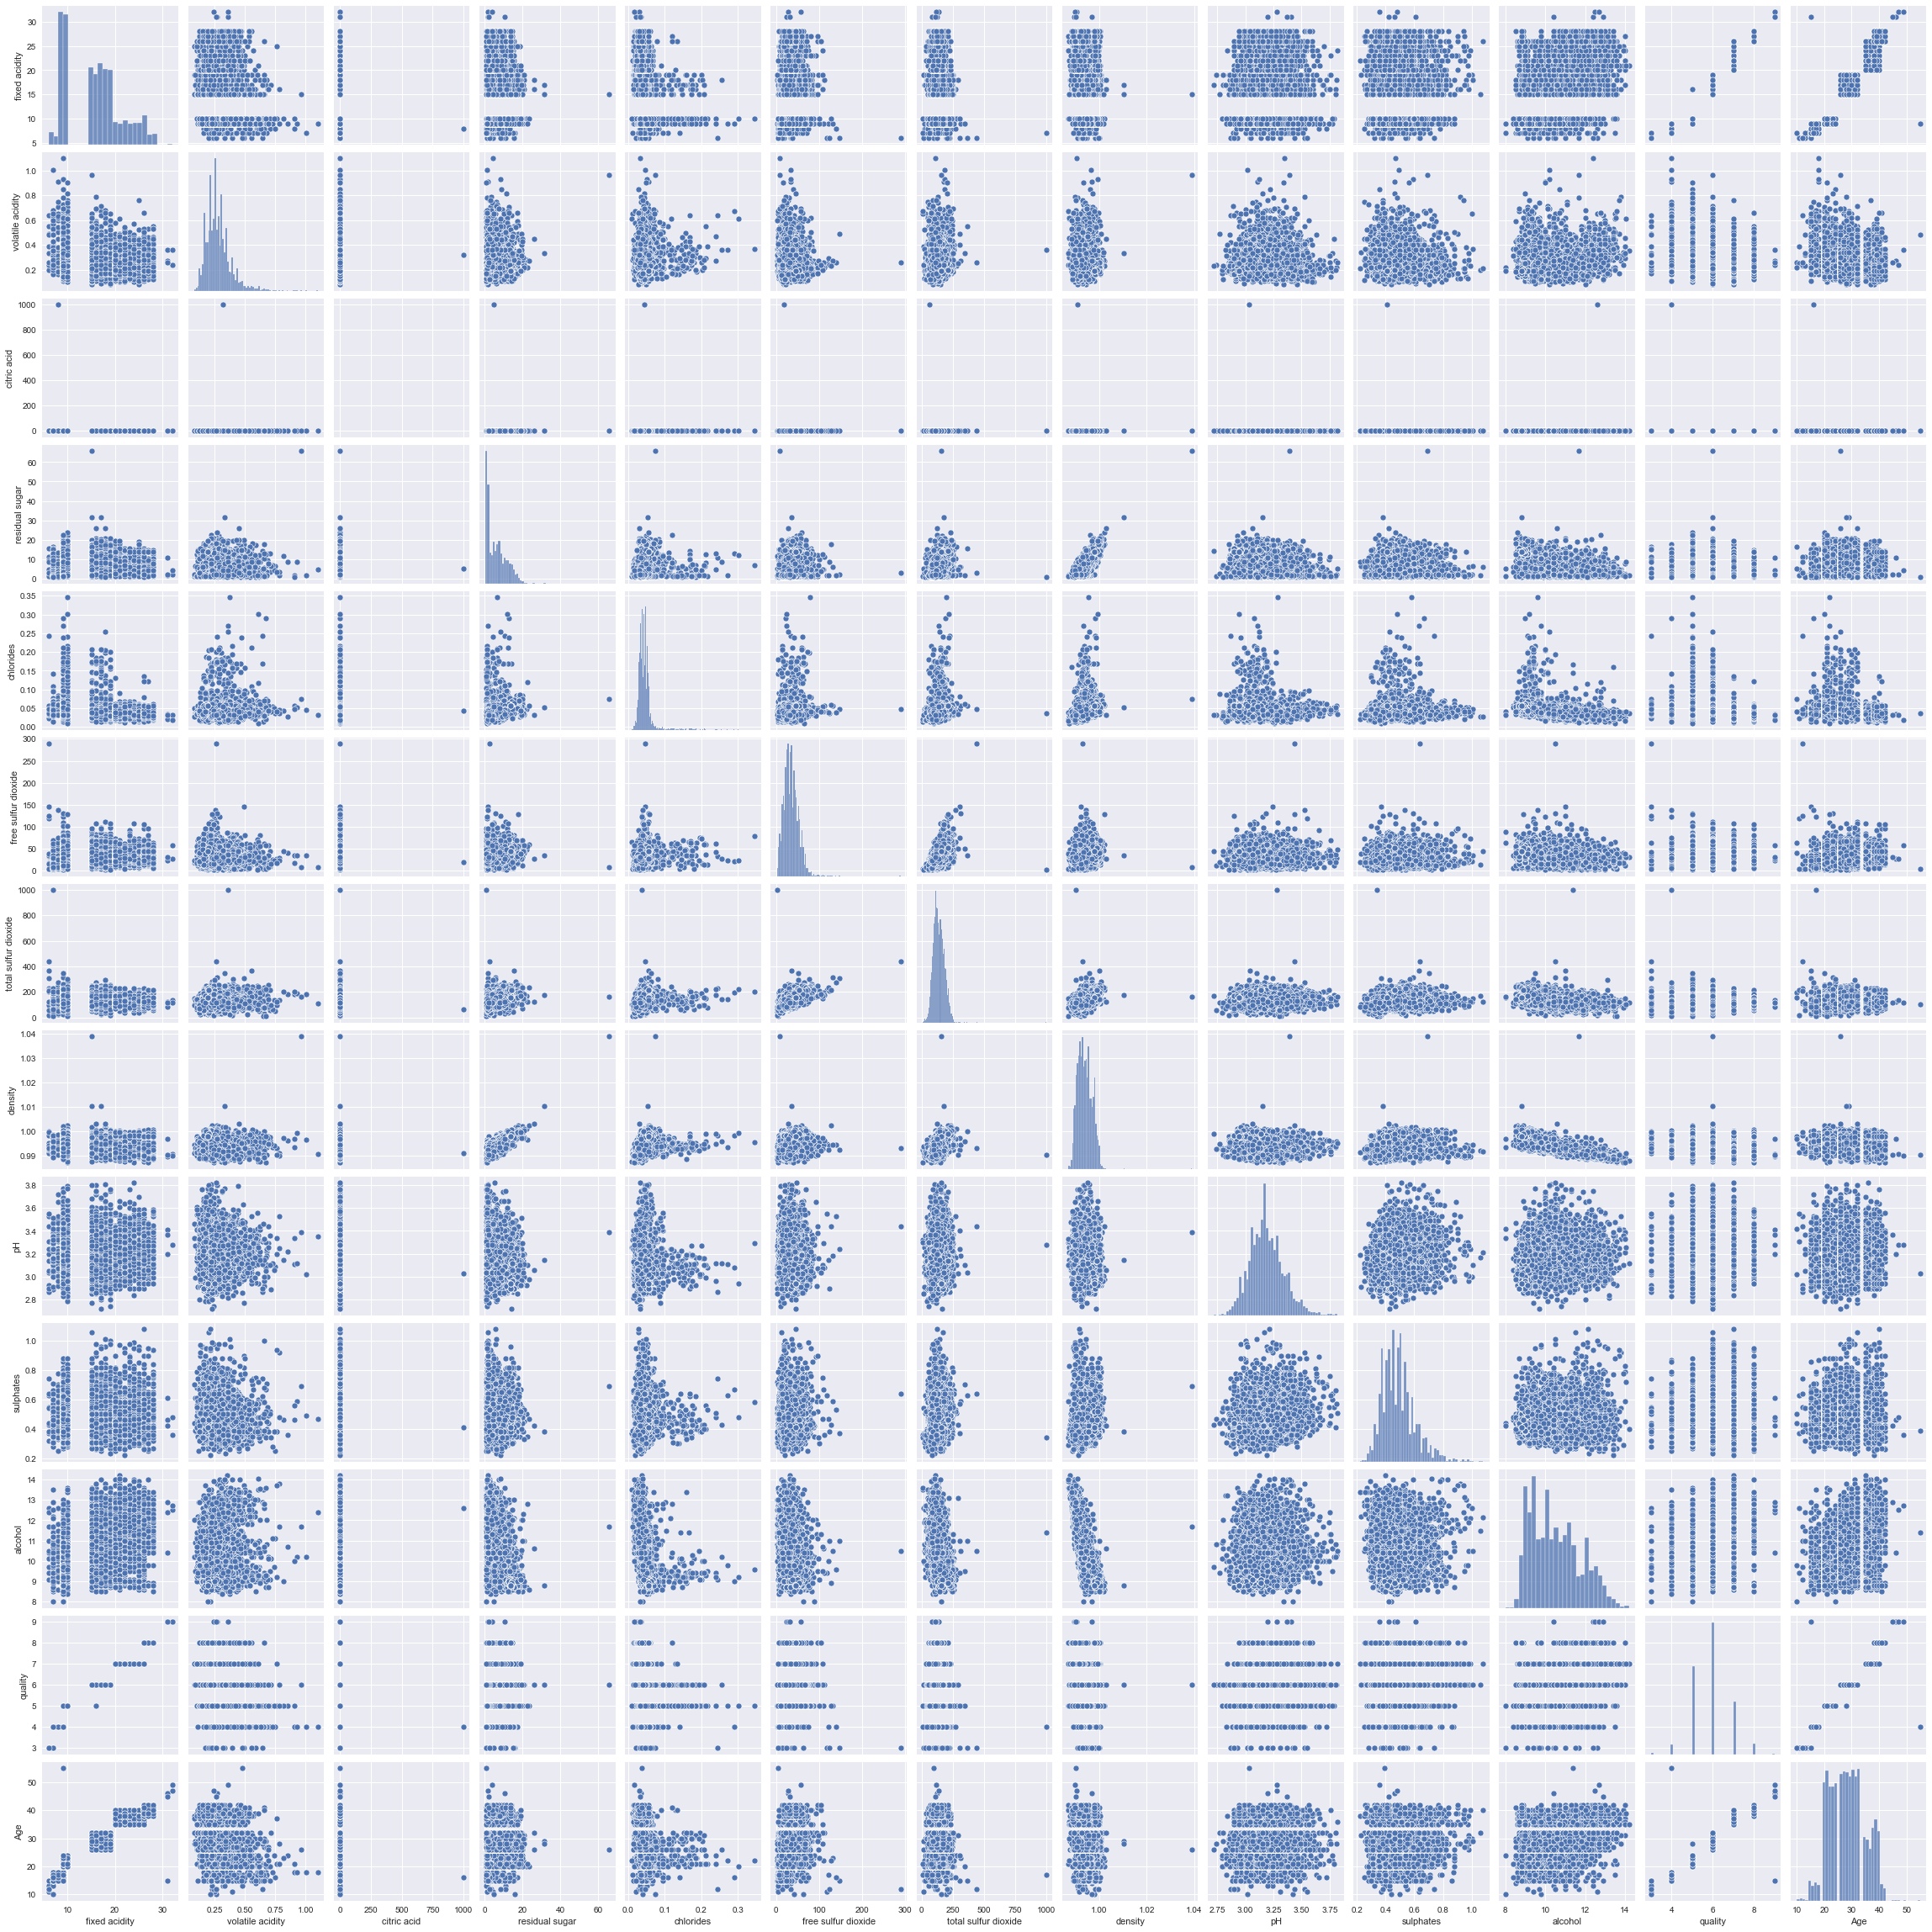

In [91]:
# Correlations of all variables plotted against each other

sns.pairplot(df1)

## Bivariate Analysis

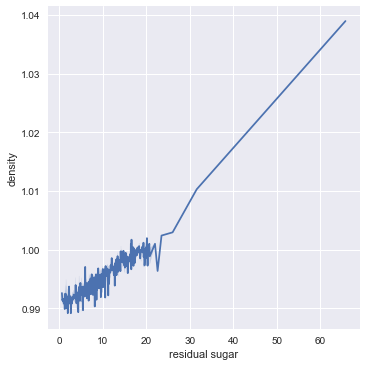

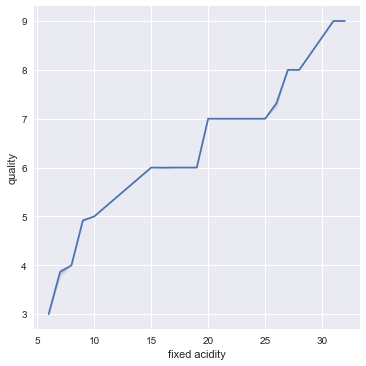

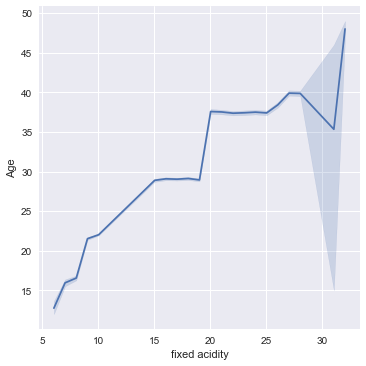

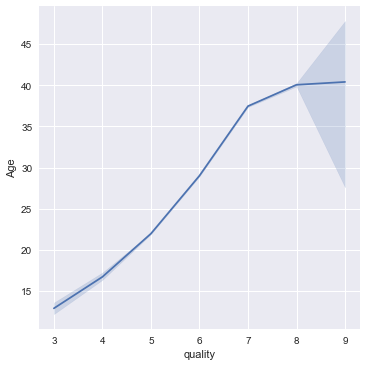

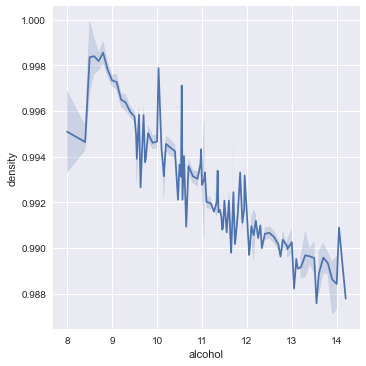

In [92]:
# Visual representation of the pairs of most correlated variables

sns.relplot(data=df1, x='residual sugar', y='density', kind="line")
sns.relplot(data=df1, x='fixed acidity', y='quality', kind="line")
sns.relplot(data=df1, x='fixed acidity', y='Age', kind="line")
sns.relplot(data=df1, x='quality', y='Age', kind="line")
sns.relplot(data=df1, x='alcohol', y='density', kind="line")
plt.show()

## Multivariate Analysis

In [93]:
# Plotting the relationship between fixed acidity, age and quality

fig = px.scatter(df1, x= df1["fixed acidity"], y = df1["Age"], color= df1.quality, size= df1.quality,
                hover_data= ["quality"])
fig.show()

# Best rated wines (from 7/10 upwards) present high fixed acidity (>20) and and age of 30+ (years, I guess)
# with an exception of a young wine of 15 (years, I guess) which recived a 9/10 score
# Seems that when a wine is very old (55+) it has low fixed acidity and it is not good (low score) but this is
# not certain as we only have a datapoint of 50+ age

## Feature Scaling

In [94]:
df1.shape

(4897, 13)

In [95]:
df1.density

0       0.99800
1       0.99130
2       0.99680
3       0.99370
4       0.99150
         ...   
4893    0.99700
4894    0.98965
4895    0.99055
4896    0.98980
4897    0.99030
Name: density, Length: 4897, dtype: float64

In [96]:
# Prepare the data and drop the target variable

data = df1.drop('density', axis=1)
dfname = data.columns

In [97]:
data.shape

(4897, 12)

In [98]:
# Initialise the scaler. I'll finally play safe using with the MinMax method. I tried with Robust scaler
# but I get negative values and the range is larger.

scaler = MinMaxScaler() 

# Scale data 

df_scaled = scaler.fit_transform(data)
df_scaled = pd.DataFrame(df_scaled, columns= dfname).reset_index(drop=True)

In [99]:
df_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Age
0,0.038462,0.176471,0.00021,0.239264,0.192878,0.135889,0.189899,0.272727,0.325581,0.290323,0.0,0.000000
1,0.000000,0.156863,0.00044,0.044479,0.059347,0.010453,0.101010,0.736364,0.244186,0.596774,0.0,0.044444
2,0.038462,0.500000,0.00038,0.015337,0.169139,0.111498,0.174747,0.463636,0.186047,0.080645,0.0,0.088889
3,0.038462,0.235294,0.00032,0.159509,0.086053,0.048780,0.057576,0.472727,0.209302,0.564516,0.0,0.066667
4,0.000000,0.303922,0.00040,0.061350,0.038576,0.010453,0.010101,0.536364,0.174419,0.741935,0.0,0.022222
...,...,...,...,...,...,...,...,...,...,...,...,...
4892,0.961538,0.186275,0.00045,0.153374,0.077151,0.090592,0.116162,0.436364,0.279070,0.387097,1.0,0.800000
4893,0.961538,0.274510,0.00029,0.015337,0.035608,0.076655,0.076768,0.627273,0.453488,0.709677,1.0,0.111111
4894,1.000000,0.156863,0.00036,0.021472,0.065282,0.087108,0.131313,0.509091,0.302326,0.725806,1.0,0.822222
4895,1.000000,0.274510,0.00034,0.055215,0.026706,0.191638,0.111111,0.509091,0.162791,0.758065,1.0,0.866667


In [100]:
# Let's reassign outcome

df_ok = pd.concat([df_scaled, df1.density.reset_index(drop=True)], axis=1)

In [101]:
df_ok

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,Age,density
0,0.038462,0.176471,0.00021,0.239264,0.192878,0.135889,0.189899,0.272727,0.325581,0.290323,0.0,0.000000,0.99800
1,0.000000,0.156863,0.00044,0.044479,0.059347,0.010453,0.101010,0.736364,0.244186,0.596774,0.0,0.044444,0.99130
2,0.038462,0.500000,0.00038,0.015337,0.169139,0.111498,0.174747,0.463636,0.186047,0.080645,0.0,0.088889,0.99680
3,0.038462,0.235294,0.00032,0.159509,0.086053,0.048780,0.057576,0.472727,0.209302,0.564516,0.0,0.066667,0.99370
4,0.000000,0.303922,0.00040,0.061350,0.038576,0.010453,0.010101,0.536364,0.174419,0.741935,0.0,0.022222,0.99150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892,0.961538,0.186275,0.00045,0.153374,0.077151,0.090592,0.116162,0.436364,0.279070,0.387097,1.0,0.800000,0.99700
4893,0.961538,0.274510,0.00029,0.015337,0.035608,0.076655,0.076768,0.627273,0.453488,0.709677,1.0,0.111111,0.98965
4894,1.000000,0.156863,0.00036,0.021472,0.065282,0.087108,0.131313,0.509091,0.302326,0.725806,1.0,0.822222,0.99055
4895,1.000000,0.274510,0.00034,0.055215,0.026706,0.191638,0.111111,0.509091,0.162791,0.758065,1.0,0.866667,0.98980


In [102]:
# Eliminate the NaNs that have appeared by resetting the index

#df_ok = pd.concat([df_scaled.reset_index(drop=True),
                      # df1.density.reset_index(drop=True)],
                      #axis=1, ignore_index=True)

## Linear Regression

### Select the target variable

In [103]:
# Select the x variable that has a higher linear relation with density (r = 0.82)

x = df_ok["residual sugar"] # aka residual sugar
y = df_ok["density"] # aka density

### Split data into train and test set

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # test size is 30%

In [105]:
print('Shape of the raw data (x): {}'.format (x.shape))
print('Shape of the target variable (y): {}'.format (y.shape))

print('\nShape of the Train data (x_train): {}'.format (x_train.shape))
print('Shape of the Train data (y_train): {}'.format (y_train.shape))

print('\nShape of the Test data (x_test): {}'.format (x_test.shape))
print('Shape of the target Test data (y_test): {}'.format (y_test.shape))

Shape of the raw data (x): (4897,)
Shape of the target variable (y): (4897,)

Shape of the Train data (x_train): (3427,)
Shape of the Train data (y_train): (3427,)

Shape of the Test data (x_test): (1470,)
Shape of the target Test data (y_test): (1470,)


### Instantiate & train the model

In [106]:
# Convert values into numpy arrays

y_train =  np.array(y_train).reshape(-1, 1)  
x_train = np.array(x_train).reshape(-1, 1) 

y_test =  np.array(y_test).reshape(-1, 1)  
x_test = np.array(x_test).reshape(-1, 1)

In [107]:
# Instantiate and train the model

lm = LinearRegression(normalize=True)

lm.fit(x_train, y_train)

LinearRegression(normalize=True)

### Evaluate model predictions

In [108]:
# Target predicted values and covert them into np array

y_pred = lm.predict(x_test)
y_pred = np.array(y_pred).reshape(-1, 1) 

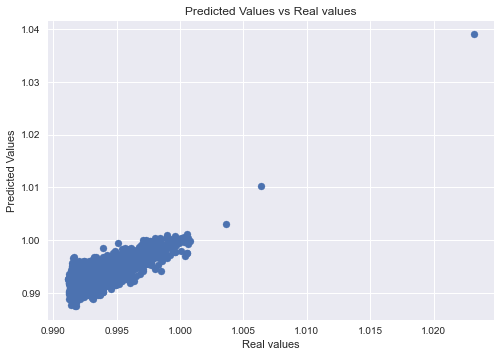

In [109]:
# Plotting predicted vs real values

plt.style.use('seaborn')
plt.scatter(y_pred, y_test)
plt.title('Predicted Values vs Real values')
plt.xlabel('Real values')
plt.ylabel('Predicted Values')
plt.show()

In [110]:
# Seems that for smaller real values the prediction is worse and when they increase the model
# starts to perform better, even if there is some "noise" all around aka data points not correctly predicted

### Evaluate model performance

In [111]:
# TRAIN

y_predTrain = lm.predict(x_train)

MAE_lTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_lTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_lTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_lTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)

MAE: 0.0012992896420662848
MSE: 2.5806821238001524e-06
RMSE: 0.002
R2 Score: 0.6979032030532439


In [112]:
# TEST

MAE_l = metrics.mean_absolute_error(y_test, y_pred)
MSE_l = metrics.mean_squared_error(y_test, y_pred)
RMSE_l = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_l = r2_score(y_test, y_pred)

print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)

MAE: 0.0013278839391697077
MSE: 2.809708307491207e-06
RMSE: 0.002
R2 Score: 0.7147776789785907


In [113]:
# Conclusions:
# Test metrics are almost equal to train ones.
# MAE, MSE and RMSE are negatively-oriented scores. 
# We can do better, results are not that good...it seems that we have
# high bias/underfitting aka this model is too simple and does not
# capture the patterns in the data

## Multilinear Regression

### Select target and features

In [114]:
# Split data into target (dependent variable) and feature (independent) variables

features = df_ok[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
       'pH', 'sulphates', 'alcohol', 'quality', "Age"]]
target = df_ok.density

In [115]:
X = features
y = target

### Split data into train and test

In [116]:
# Test size is 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

### Instantiate & train the model

In [117]:
mReg = LinearRegression()
mReg.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = mReg.predict(X_test)

### Evaluate model predictions

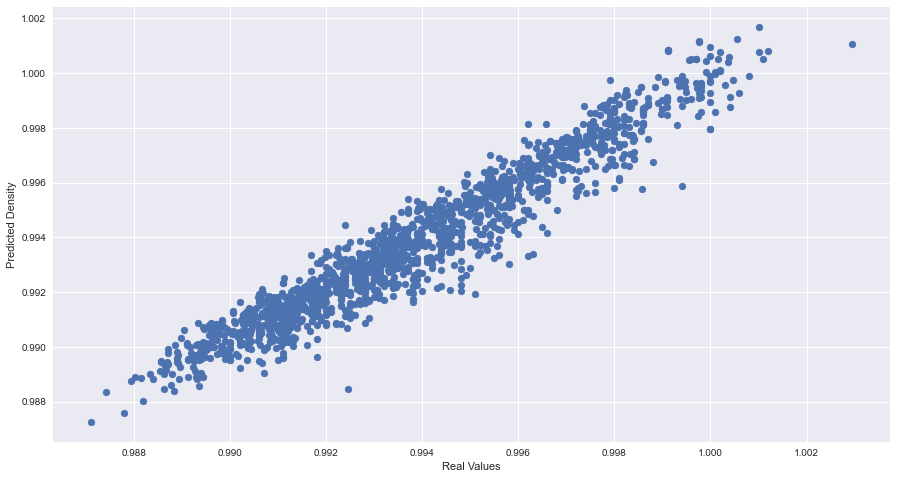

In [119]:
# Plotting predicted vs real values

plt.figure(figsize=(15,8))
plt.scatter(y_test, y_pred)

plt.xlabel('Real Values')
plt.ylabel('Predicted Density')
plt.show()

In [120]:
# It's better! Seems that the model performed better in predicting y values.
# The lower values are predicted much better now.

### Evaluate model performance

In [122]:
# TRAIN

y_predTrain = mReg.predict(X_train)

MAE_mlTrain = metrics.mean_absolute_error(y_train, y_predTrain)
MSE_mlTrain = metrics.mean_squared_error(y_train,y_predTrain)
RMSE_mlTrain = np.sqrt(metrics.mean_squared_error(y_train, y_predTrain))
R2_mlTrain = r2_score(y_train, y_predTrain)

print('MAE:', MAE_mlTrain)
print('MSE:', MSE_mlTrain)
print('RMSE:', round(RMSE_mlTrain,3))
print('R2 Score:', R2_mlTrain)

MAE: 0.0005658478115066474
MSE: 7.009776727053388e-07
RMSE: 0.001
R2 Score: 0.9241370587131829


In [121]:
# TEST

MAE_ml = metrics.mean_absolute_error(y_test, y_pred)
MSE_ml = metrics.mean_squared_error(y_test, y_pred)
RMSE_ml = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_ml = r2_score(y_test, y_pred)

print('MAE:', MAE_ml)
print('MSE:', MSE_ml)
print('RMSE:', round(RMSE_ml,3))
print('R2 Score:', R2_ml)

MAE: 0.0005856264323002545
MSE: 5.833338134940731e-07
RMSE: 0.001
R2 Score: 0.9297733159947513


In [123]:
# Conclusions:
# Train metrics are better than test metrics since
# the MAE, MSE, RMSE are smaller and R2 Score is larger.

## Choose the best model

In [124]:
print("*SLR Test Metrics*")
print('MAE:', MAE_l)
print('MSE:', MSE_l)
print('RMSE:', round(RMSE_l,3))
print('R2 Score:', R2_l)
print("----------------------")
print("*SLR Train Metrics*")
print('MAE:', MAE_lTrain)
print('MSE:', MSE_lTrain)
print('RMSE:', round(RMSE_lTrain,3))
print('R2 Score:', R2_lTrain)
print("----------------------")
print("*MLR Test Metrics*")
print('MAE:', MAE_ml)
print('MSE:', MSE_ml)
print('RMSE:', round(RMSE_ml,3))
print('R2 Score:', R2_ml)
print("----------------------")
print("*MLR Train Metrics*")
print('MAE:', MAE_mlTrain)
print('MSE:', MSE_mlTrain)
print('RMSE:', round(RMSE_mlTrain,3))
print('R2 Score:', R2_mlTrain)

*SLR Test Metrics*
MAE: 0.0013278839391697077
MSE: 2.809708307491207e-06
RMSE: 0.002
R2 Score: 0.7147776789785907
----------------------
*SLR Train Metrics*
MAE: 0.0012992896420662848
MSE: 2.5806821238001524e-06
RMSE: 0.002
R2 Score: 0.6979032030532439
----------------------
*MLR Test Metrics*
MAE: 0.0005856264323002545
MSE: 5.833338134940731e-07
RMSE: 0.001
R2 Score: 0.9297733159947513
----------------------
*MLR Train Metrics*
MAE: 0.0005658478115066474
MSE: 7.009776727053388e-07
RMSE: 0.001
R2 Score: 0.9241370587131829


## Conclusions

If we compare test metrics of SLR and MLR we can see that the results improved quite significantly in the MLR model. 

The R2 score there is +0.90 there.

If we consider train metrics, the result is similar because here, too, MLR performed better than SLR.
